# IMPORT THE LIBRARIES

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
# checkinh their versions:
print(tf.__version__)
print(keras.__version__)

2.4.0
2.4.0


#Loading the dataset using the keras library:

In [29]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

###know the shape and datatype of the training data

In [30]:
X_train_full.shape # outputs (60000, 28, 28) means it has 60000 images , each img of dimension (28-height*28-width)

(60000, 28, 28)

In [31]:
X_train_full.dtype # outputs int datatype, rather then float.

dtype('uint8')

# Creating a Valid_dset, note: train_full-dset and test_full_dset already exists

#### First create a train_dset from X_train_full

In [32]:
X_train = X_train_full[5000:]/255.0  # dividing by 255.0 scales values btw (0,1) and typecast value to float.
y_train = y_train_full[5000:] # y_train contains labels.

#### Create valid_dset from X_train_full, and also scale and typecast values.

In [33]:
X_valid = X_train_full[:5000]/255.0
y_valid = y_train_full[:5000]

#### Creating class_names to know for fashion items , that we are dealing with 

In [34]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [35]:
# y_train[0] -> return a fashion item label index   
class_names[y_train[0]] 

'Coat'

# Creating Model using Sequential API

In [36]:
# Creates a model using sequential API.
model = keras.models.Sequential() 

### Adding Input Layer

In [37]:
# Add the first Input layer to the model.
model.add(keras.layers.Flatten(input_shape=[28,28])) # Flattens a img of (28,28) to 1d array , as it computes , img.reshape(-1,1)

### Adding Hidden layers:

##### Adding first hidden layer:

In [38]:
model.add(keras.layers.Dense(300, activation="relu")) # hidden layer with 300 neurons and their activation=Relu

##### Adding 2nd hidden layer

In [39]:
model.add(keras.layers.Dense(200, activation='relu')) # hidden layer with 100 neurons and their activation=Relu

##### Adding 3rd hidden layer:

In [40]:
model.add(keras.layers.Dense(100, activation='relu')) #hidden layer with 200 neurons and their activation=Relu

##### Adding 4th hidden layer:

In [41]:
model.add(keras.layers.Dense(50, activation='relu')) #hidden layer with 50 neurons and their activation=Relu

### Adding Output Layer

In [42]:
model.add(keras.layers.Dense(10, activation="softmax")) # neurons=10 -> 1 per class, and activation='softmax' as classes are exclusive

In [43]:
"""
Instead of adding the layers one by one as we just did, you can pass a list of layers
when creating the Sequential model:

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])
"""

'\nInstead of adding the layers one by one as we just did, you can pass a list of layers\nwhen creating the Sequential model:\n\nmodel = keras.models.Sequential([\n keras.layers.Flatten(input_shape=[28, 28]),\n keras.layers.Dense(300, activation="relu"),\n keras.layers.Dense(100, activation="relu"),\n keras.layers.Dense(10, activation="softmax")\n])\n'

# Keras: model methods for accessing layers and set/get their weights: 

In [44]:
# model.summary(): gives the summary of model
model.summary()

"""
Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters!
"""

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 321,360
Trainable params: 321,360
Non-trainable params: 0
________________________________________________

'\nNote that Dense layers often have a lot of parameters. For example, the first hidden\nlayer has 784 × 300 connection weights, plus 300 bias terms, which adds up to\n235,500 parameters!\n'

In [45]:
# model.layer: gives us the list of model layers
model.layers

# Indexing layers :
model.layers[1]

# for other tweaks and tricks refer book.

# Compiling the  Model

In [46]:
# After a model is created, you must call its compile() method to specify the loss function and the optimizer to use.
# Optionally, you can also specify a list of extra metrics to compute during training and evaluation:

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='sgd',
    metrics=['accuracy'])

"""
First, we use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐
fication (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.
"""

'\nFirst, we use the "sparse_categorical_crossen\ntropy" loss because we have sparse labels (i.e., for each instance there is just a target\nclass index, from 0 to 9 in this case), and the classes are exclusive. If instead we had\none target probability per class for each instance (such as one-hot vectors, e.g. [0.,\n0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need\nto use the "categorical_crossentropy" loss instead. If we were doing binary classi‐\nfication (with one or more binary labels), then we would use the "sigmoid" (i.e.,\nlogistic) activation function in the output layer instead of the "softmax" activation\nfunction, and we would use the "binary_crossentropy" loss.\n'

# Training and Evaluating the Model

In [47]:
# model.fit(): fit() method is used to train the model.
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), batch_size=64)

Epoch 1/50
860/860 [==============================] - 5s 6ms/step - loss: 1.4114 - accuracy: 0.5312 - val_loss: 0.6096 - val_accuracy: 0.7870
Epoch 2/50
860/860 [==============================] - 5s 6ms/step - loss: 0.5809 - accuracy: 0.7931 - val_loss: 0.4811 - val_accuracy: 0.8364
Epoch 3/50
860/860 [==============================] - 5s 6ms/step - loss: 0.5011 - accuracy: 0.8252 - val_loss: 0.4465 - val_accuracy: 0.8470
Epoch 4/50
860/860 [==============================] - 5s 6ms/step - loss: 0.4670 - accuracy: 0.8343 - val_loss: 0.4341 - val_accuracy: 0.8480
Epoch 5/50
860/860 [==============================] - 5s 6ms/step - loss: 0.4388 - accuracy: 0.8448 - val_loss: 0.5857 - val_accuracy: 0.7708
Epoch 6/50
860/860 [==============================] - 5s 6ms/step - loss: 0.4126 - accuracy: 0.8542 - val_loss: 0.4936 - val_accuracy: 0.8206
Epoch 7/50
860/860 [==============================] - 5s 6ms/step - loss: 0.3987 - accuracy: 0.8561 - val_loss: 0.3831 - val_accuracy: 0.8628
Epoch 

## Plotting the learning curves:

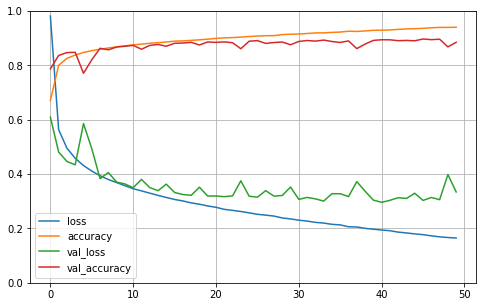

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# Evaluating the model's peroformance for test_dset

In [49]:
# use model.evaluate();
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 73.1649 - accuracy: 0.8422


[73.16486358642578, 0.842199981212616]

# Making Predictions using Model.

In [50]:
# using model.predict();

X_new = X_test[:3]
y_pred = model.predict(X_new).round(2) # round to 2 decimals.
y_pred
# this will return class label-index

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
#  If we only care about classes with highest probability, we can use model.predict_classes() method.
import numpy as np

y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [52]:
# lets check if y_pred matches with the true labels/classes or not
y_new = y_test[:3]
print(y_new)
np.array(class_names)[y_new]

[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')